In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import unidecode
import unicodedata
import re
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [33]:
# Cargamos el dataset
dfrent = pd.read_csv('Dataset/renting_Barcelona.csv', delimiter=',')

In [34]:
# Vemos que columnas tiene el dataset
print(dfrent.columns.tolist())

['id', 'price', 'currency', 'latitude', 'longitude', 'sq_meters', 'sq_meters_built', 'rooms', 'bathrooms', 'balcony', 'terrace', 'exterior', 'orientation', 'floor', 'rooftop', 'elevator', 'doorman', 'pool', 'ac', 'heating', 'year_built', 'quality', 'city', 'neighborhood', 'dist_city_center', 'furniture', 'garage', 'property_type', 'garden', 'closest_station', 'dist_closest_station', 'created_at', 'last_seen']


In [35]:
# Mostramos las dimensiones del dataset
print(f"Dimensiones del dataset: {dfrent.shape}")

Dimensiones del dataset: (8502, 33)


In [36]:
# Vemos los data types de las columnas
print("Tipos de datos de las columnas:")
print(dfrent.dtypes)

Tipos de datos de las columnas:
id                        int64
price                     int64
currency                 object
latitude                float64
longitude               float64
sq_meters               float64
sq_meters_built           int64
rooms                     int64
bathrooms                 int64
balcony                 float64
terrace                 float64
exterior                float64
orientation              object
floor                   float64
rooftop                 float64
elevator                float64
doorman                 float64
pool                    float64
ac                      float64
heating                  object
year_built              float64
quality                   int64
city                     object
neighborhood             object
dist_city_center        float64
furniture               float64
garage                  float64
property_type            object
garden                  float64
closest_station          object
dist_clo

In [37]:
dfrent.head(5)

id  price currency   latitude  longitude  sq_meters  sq_meters_built  \
0  536625    850    ‚Ç¨/mes  41.401708   2.154077       52.0               55   
1  545910    725    ‚Ç¨/mes  41.407221   2.135569       32.0               37   
2  570697    950    ‚Ç¨/mes  41.411508   2.164608        NaN               72   
3  591588    750    ‚Ç¨/mes  41.402256   2.140764        NaN               45   
4  610243    990    ‚Ç¨/mes  41.405327   2.146929        NaN               45   

   rooms  bathrooms  balcony  ...                neighborhood  \
0      2          1      NaN  ...                      Gr√†cia   
1      2          1      1.0  ...  Sant Gervasi - La Bonanova   
2      3          1      NaN  ...            El Baix Guinard√≥   
3      1          1      1.0  ...  Sant Gervasi - La Bonanova   
4      1          1      NaN  ...         Sarri√†-Sant Gervasi   

   dist_city_center furniture  garage  property_type  garden  closest_station  \
0          2.026455       3.0     NaN           piso     NaN          Fontana   
1          3.582409       NaN     NaN           piso     NaN        Vallcarca   
2          2.663025       3.0     NaN           piso     NaN         Alfons X   
3          2.910067       3.0     NaN           piso     NaN          Lesseps   
4          2.727149       3.0     NaN           piso     NaN          Lesseps   

   dist_closest_station       created_at        last_seen  
0              0.094111   9/1/2021 15:58   10/4/2021 6:01  
1              0.902561   9/2/2021 15:24   9/8/2021 12:29  
2              0.188177  8/28/2021 23:52  8/28/2021 23:52  
3              0.892917  8/29/2021 11:25   9/8/2021 12:29  
4              0.293784  8/30/2021 13:48  8/30/2021 14:04  

[5 rows x 33 columns]

In [38]:
# Seleccionamos las columnas numericas (int64, float64)
numerical_columns = dfrent.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Mostramos los estadisticos descriptivos de las columnas numericas
display(dfrent[numerical_columns].describe())

id         price     latitude    longitude    sq_meters  \
count  8.502000e+03   8502.000000  8502.000000  8502.000000  4967.000000   
mean   8.852101e+07   1117.482828    41.398106     2.162651    65.191464   
std    1.781127e+07   1010.198242     0.018344     0.020805    40.805539   
min    5.366250e+05    365.000000    41.353583     2.102393     3.000000   
25%    9.235744e+07    768.250000    41.382177     2.146160    45.000000   
50%    9.505698e+07    850.000000    41.397202     2.164480    58.000000   
75%    9.519903e+07   1100.000000    41.409961     2.178082    71.000000   
max    9.589512e+07  27500.000000    41.467905     2.218582   672.000000   

       sq_meters_built        rooms    bathrooms  balcony  terrace  ...  \
count      8502.000000  8502.000000  8502.000000   3485.0   1928.0  ...   
mean         72.478711     2.075394     1.265349      1.0      1.0  ...   
std          49.650215     1.155006     0.602056      0.0      0.0  ...   
min          11.000000     0.000000     1.000000      1.0      1.0  ...   
25%          50.000000     1.000000     1.000000      1.0      1.0  ...   
50%          63.000000     2.000000     1.000000      1.0      1.0  ...   
75%          79.000000     3.000000     1.000000      1.0      1.0  ...   
max         981.000000    11.000000     7.000000      1.0      1.0  ...   

       doorman   pool      ac   year_built  quality  dist_city_center  \
count      0.0  321.0  4086.0  4006.000000   8502.0       8502.000000   
mean       NaN    1.0     1.0  1950.885921      2.0          2.616749   
std        NaN    0.0     0.0    38.391917      0.0          1.409102   
min        NaN    1.0     1.0  1783.000000      2.0          0.062165   
25%        NaN    1.0     1.0  1930.000000      2.0          1.475110   
50%        NaN    1.0     1.0  1962.000000      2.0          2.481490   
75%        NaN    1.0     1.0  1974.000000      2.0          3.589782   
max        NaN    1.0     1.0  2106.000000      2.0          8.940761   

       furniture  garage  garden  dist_closest_station  
count     7250.0   385.0    51.0           8502.000000  
mean         3.0     1.0     1.0              0.392531  
std          0.0     0.0     0.0              0.290708  
min          3.0     1.0     1.0              0.007875  
25%          3.0     1.0     1.0              0.225168  
50%          3.0     1.0     1.0              0.325357  
75%          3.0     1.0     1.0              0.453814  
max          3.0     1.0     1.0              3.177445  

[8 rows x 24 columns]

In [39]:
# Checkeamos si hay valores nulos en todas las columnas
print("Valores nulos en el dataset:")
print(dfrent.isnull().sum())

Valores nulos en el dataset:
id                         0
price                      0
currency                   0
latitude                   0
longitude                  0
sq_meters               3535
sq_meters_built            0
rooms                      0
bathrooms                  0
balcony                 5017
terrace                 6574
exterior                 666
orientation             4816
floor                   1966
rooftop                 7885
elevator                 257
doorman                 8502
pool                    8181
ac                      4416
heating                 3030
year_built              4496
quality                    0
city                       0
neighborhood               0
dist_city_center           0
furniture               1252
garage                  8117
property_type              2
garden                  8451
closest_station            0
dist_closest_station       0
created_at                 0
last_seen                  0
dtype: int64


In [40]:
# Primero eliminamos las columnas del dataset ya que tienen un alto porcentaje de valores nulos
dfrent = dfrent.drop(columns=['rooftop', 'doorman', 'pool', 'orientation', 'garden', 'garage', 'furniture'])

In [41]:
# Vamos a aplicar codificacion binaria a las columnas categoricas
# Son: balcony, terrace, exterior, elevator y ac
binary_columns = ['balcony', 'terrace', 'exterior', 'elevator', 'ac']

# Reemplazamos los valores NaN por 0
dfrent[binary_columns] = dfrent[binary_columns].fillna(0)

# Nos aseguramos que todos los datos de estas columnas son binarios 1 o 0
for col in binary_columns:
    dfrent[col] = dfrent[col].apply(lambda x: 1 if x else 0)

In [42]:
# Seleccionamos solo columnas num√©ricas relevantes para estimar 'year_built'
cols_for_imputation = ['price', 'sq_meters_built', 'rooms', 'bathrooms', 'quality', 'year_built']
impute_df = dfrent[cols_for_imputation].copy()

# Normalizamos las columnas
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(impute_df)

# Aplicamos KNNImputer
imputer = KNNImputer(n_neighbors=5)
imputed_data = imputer.fit_transform(scaled_data)

# Deshacemos la normalizaci√≥n solo para 'year_built'
imputed_df = pd.DataFrame(scaler.inverse_transform(imputed_data), columns=cols_for_imputation)

# Reemplazamos los valores en dfbcn
dfrent['year_built'] = imputed_df['year_built'].round().astype(int)

In [43]:
# Imputamos los NaNs de property_type con su valor m√°s frecuente (moda)
dfrent['property_type'] = dfrent['property_type'].fillna(dfrent['property_type'].mode()[0])

In [44]:
# Imputamos "floor" por media seg√∫n "neighborhood"
dfrent['floor'] = dfrent.groupby('neighborhood')['floor'].transform(lambda x: x.fillna(x.mean()))

In [45]:
# Imputamos "heating" por moda dentro de bins de year_built
dfrent['year_built_bin'] = pd.qcut(dfrent['year_built'], q=5, duplicates='drop')
dfrent['heating'] = dfrent.groupby('year_built_bin')['heating'].transform(lambda x: x.fillna(x.mode().iloc[0]) if not x.mode().empty else x)
dfrent.drop(columns=['year_built_bin'], inplace=True)

C:\Users\heatb\AppData\Local\Temp\ipykernel_19296\105022179.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dfrent['heating'] = dfrent.groupby('year_built_bin')['heating'].transform(lambda x: x.fillna(x.mode().iloc[0]) if not x.mode().empty else x)


In [46]:
# Imputamos "sq_meters" con KMeans basado en variables relacionadas
# Variables predictoras para KMeans (deben no tener nulos)
km_df = dfrent[['sq_meters', 'sq_meters_built', 'rooms', 'price']].dropna()

# Entrenamos KMeans
kmeans = KMeans(n_clusters=5, random_state=0)
km_df['cluster'] = kmeans.fit_predict(km_df[['sq_meters_built', 'rooms', 'price']])

# Calculamos media por cluster
cluster_means = km_df.groupby('cluster')['sq_meters'].mean()

# Etiquetamos clusters en todo dfrent (donde hay info)
def assign_cluster(row):
    if pd.isna(row['sq_meters']):
        return kmeans.predict([[row['sq_meters_built'], row['rooms'], row['price']]])[0]
    else:
        return np.nan

dfrent['cluster'] = dfrent.apply(assign_cluster, axis=1)

# Imputar con media del cluster
dfrent['sq_meters'] = dfrent.apply(
    lambda row: cluster_means[row['cluster']] if pd.isna(row['sq_meters']) else row['sq_meters'], axis=1
)

# Limpieza final
dfrent.drop(columns=['cluster'], inplace=True)

c:\Users\heatb\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
c:\Users\heatb\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
c:\Users\heatb\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
c:\Users\heatb\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
c:\Users\heatb\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
c:\Users\heatb\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with

In [47]:
if dfrent.isnull().sum().sum() == 0:
    print("‚úÖ Todos los valores nulos han sido imputados correctamente.")
else:
    print("‚ö†Ô∏è A√∫n quedan valores nulos en el dataset:")
    print(dfrent.isnull().sum()[dfrent.isnull().sum() > 0])

‚úÖ Todos los valores nulos han sido imputados correctamente.


In [48]:
# Revisitamos los estadisticos descriptivos tras la imputaci√≥n
numerical_columns2 = dfrent.select_dtypes(include=['int64', 'float64']).columns.tolist()
display(dfrent[numerical_columns2].describe())

id         price     latitude    longitude    sq_meters  \
count  8.502000e+03   8502.000000  8502.000000  8502.000000  8502.000000   
mean   8.852101e+07   1117.482828    41.398106     2.162651    66.662899   
std    1.781127e+07   1010.198242     0.018344     0.020805    39.005620   
min    5.366250e+05    365.000000    41.353583     2.102393     3.000000   
25%    9.235744e+07    768.250000    41.382177     2.146160    54.000000   
50%    9.505698e+07    850.000000    41.397202     2.164480    56.838981   
75%    9.519903e+07   1100.000000    41.409961     2.178082    65.000000   
max    9.589512e+07  27500.000000    41.467905     2.218582   672.000000   

       sq_meters_built        rooms    bathrooms      balcony      terrace  \
count      8502.000000  8502.000000  8502.000000  8502.000000  8502.000000   
mean         72.478711     2.075394     1.265349     0.409904     0.226770   
std          49.650215     1.155006     0.602056     0.491845     0.418767   
min          11.000000     0.000000     1.000000     0.000000     0.000000   
25%          50.000000     1.000000     1.000000     0.000000     0.000000   
50%          63.000000     2.000000     1.000000     0.000000     0.000000   
75%          79.000000     3.000000     1.000000     1.000000     0.000000   
max         981.000000    11.000000     7.000000     1.000000     1.000000   

          exterior        floor     elevator           ac  quality  \
count  8502.000000  8502.000000  8502.000000  8502.000000   8502.0   
mean      0.811103     3.042673     0.663138     0.480593      2.0   
std       0.391450     1.860690     0.472665     0.499653      0.0   
min       0.000000     1.000000     0.000000     0.000000      2.0   
25%       1.000000     2.000000     0.000000     0.000000      2.0   
50%       1.000000     3.000000     1.000000     0.000000      2.0   
75%       1.000000     4.000000     1.000000     1.000000      2.0   
max       1.000000    29.000000     1.000000     1.000000      2.0   

       dist_city_center  dist_closest_station  
count       8502.000000           8502.000000  
mean           2.616749              0.392531  
std            1.409102              0.290708  
min            0.062165              0.007875  
25%            1.475110              0.225168  
50%            2.481490              0.325357  
75%            3.589782              0.453814  
max            8.940761              3.177445

Ahora que hemos terminado del limpiar los valores nulos del dataset, nos disponemos a agrupar los barrios por distritos para tener una mayor granulaci√≥n y homogeneidad a la hora de hacer calculos con esta variable.

In [49]:
# Diccionario barrio ‚Üí distrito con nombres normalizados (sin tildes, min√∫sculas, sin espacios extra)
barrio_a_distrito = {
    # Sarri√† - Sant Gervasi
    'el putxet i el farro': 'Sarri√† - Sant Gervasi',
    'sarria': 'Sarri√† - Sant Gervasi',
    'sant gervasi - la bonanova': 'Sarri√† - Sant Gervasi',
    'sant gervasi - galvany': 'Sarri√† - Sant Gervasi',
    'les tres torres': 'Sarri√† - Sant Gervasi',
    'vallvidrera, el tibidabo i les planes': 'Sarri√† - Sant Gervasi',

    # Sants - Montju√Øc
    'la bordeta': 'Sants - Montju√Øc',
    'la font de la guatlla': 'Sants - Montju√Øc',
    'hostafrancs': 'Sants - Montju√Øc',
    'la marina de port': 'Sants - Montju√Øc',
    'la marina del prat vermell': 'Sants - Montju√Øc',
    'el poble-sec': 'Sants - Montju√Øc',
    'sants': 'Sants - Montju√Øc',
    'sants-badal': 'Sants - Montju√Øc',

    # Les Corts
    'les corts': 'Les Corts',
    'la maternitat i sant ramon': 'Les Corts',
    'pedralbes': 'Les Corts',

    # Ciutat Vella
    'la barceloneta': 'Ciutat Vella',
    'el gotic': 'Ciutat Vella',
    'el raval': 'Ciutat Vella',
    'sant pere, santa caterina i la ribera': 'Ciutat Vella',

    # L'Eixample
    'l antiga esquerra de l eixample': "L'Eixample",
    'la nova esquerra de l eixample': "L'Eixample",
    'la dreta de l eixample': "L'Eixample",
    'el fort pienc': "L'Eixample",
    'la sagrada familia': "L'Eixample",
    'sant antoni': "L'Eixample",

    # Gr√†cia
    'la vila de gracia': 'Gr√†cia',
    'el camp d en grassot i gracia nova': 'Gr√†cia',
    'la salut': 'Gr√†cia',
    'el coll': 'Gr√†cia',
    'vallcarca i els penitents': 'Gr√†cia',

    # Horta - Guinard√≥
    'el baix guinardo': 'Horta - Guinard√≥',
    'el guinardo': 'Horta - Guinard√≥',
    'can baro': 'Horta - Guinard√≥',
    'el carmel': 'Horta - Guinard√≥',
    'la font d en fargues': 'Horta - Guinard√≥',
    'horta': 'Horta - Guinard√≥',
    'la clota': 'Horta - Guinard√≥',
    'montbau': 'Horta - Guinard√≥',
    'sant genis dels agudells': 'Horta - Guinard√≥',
    'la teixonera': 'Horta - Guinard√≥',
    'la vall d hebron': 'Horta - Guinard√≥',

    # Nou Barris
    'can peguera': 'Nou Barris',
    'canyelles': 'Nou Barris',
    'ciutat meridiana': 'Nou Barris',
    'la guineueta': 'Nou Barris',
    'porta': 'Nou Barris',
    'la prosperitat': 'Nou Barris',
    'les roquetes': 'Nou Barris',
    'torre baro': 'Nou Barris',
    'la trinitat nova': 'Nou Barris',
    'el turo de la peira': 'Nou Barris',
    'vallbona': 'Nou Barris',
    'verdum': 'Nou Barris',
    'vilapicina i la torre llobeta': 'Nou Barris',

    # Sant Andreu
    'baro de viver': 'Sant Andreu',
    'el bon pastor': 'Sant Andreu',
    'el congres i els indians': 'Sant Andreu',
    'navas': 'Sant Andreu',
    'sant andreu de palomar': 'Sant Andreu',
    'la sagrera': 'Sant Andreu',
    'la trinitat vella': 'Sant Andreu',

    # Sant Mart√≠
    'el besos i el maresme': 'Sant Mart√≠',
    'el clot': 'Sant Mart√≠',
    'el camp de l arpa del clot': 'Sant Mart√≠',
    'diagonal mar i el front maritim del poblenou': 'Sant Mart√≠',
    'el parc i la llacuna del poblenou': 'Sant Mart√≠',
    'el poblenou': 'Sant Mart√≠',
    'provencals del poblenou': 'Sant Mart√≠',
    'sant marti de provencals': 'Sant Mart√≠',
    'la verneda i la pau': 'Sant Mart√≠',
    'la vila olimpica del poblenou': 'Sant Mart√≠'
}


In [50]:
# A√±adir asociaciones adicionales de barrios no reconocidos
barrio_a_distrito.update({
    'gracia': 'Gr√†cia',
    'sarria-sant gervasi': 'Sarri√† - Sant Gervasi',
    'vila de gracia': 'Gr√†cia',
    'eixample': "L'Eixample",
    'sants - badal': 'Sants - Montju√Øc',
    'la nova esquerra de l eixample': "L'Eixample",
    'l antiga esquerra de l eixample': "L'Eixample",
    'el poble sec - parc de montjuic': 'Sants - Montju√Øc',
    'el camp d en grassot i gracia nova': 'Gr√†cia',
    'el camp de l arpa del clot': 'Horta - Guinard√≥',
    'la dreta de l eixample': "L'Eixample",
    'ciutat vella': 'Ciutat Vella',
    'sant pere - santa caterina i la ribera': 'Ciutat Vella',
    'horta guinardo': 'Horta - Guinard√≥',
    'sant andreu': 'Sant Andreu',
    'nou barris': 'Nou Barris',
    'sants-montjuic': 'Sants - Montju√Øc',
    'la font d en fargues': 'Horta - Guinard√≥',
    'el besos': 'Sant Mart√≠',
    'sant genis dels agudells - montbau': 'Horta - Guinard√≥',
    'la vall d hebron - la clota': 'Horta - Guinard√≥',
    'can peguera - el turo de la peira': 'Nou Barris',
    'sant marti': 'Sant Mart√≠',
    'la marina del port': 'Sants - Montju√Øc',
    'verdun': 'Nou Barris',
    'ciutat meridiana - torre baro - vallbona': 'Nou Barris',
    'vallvidrera - el tibidabo i les planes': 'Sarri√† - Sant Gervasi',
})


In [51]:
def clean_text(text):
    if pd.isnull(text):
        return ''
    return unidecode.unidecode(text.lower().strip())

# Crear columna limpia
dfrent['neighborhood_clean'] = dfrent['neighborhood'].apply(clean_text)

In [52]:
def limpiar_texto(texto):
    if pd.isnull(texto):
        return ''
    # Quitar acentos y normalizar
    texto = ''.join(c for c in unicodedata.normalize('NFD', texto) if unicodedata.category(c) != 'Mn')
    # Pasar a min√∫sculas
    texto = texto.lower()
    # Reemplazar ap√≥strofes, guiones y caracteres raros por espacios
    texto = texto.replace("'", ' ').replace('-', ' ')
    # Eliminar caracteres no alfanum√©ricos (excepto espacios)
    texto = re.sub(r'[^a-z0-9\s]', '', texto)
    # Eliminar m√∫ltiples espacios
    texto = re.sub(r'\s+', ' ', texto).strip()
    return texto

In [53]:
# Limpiamos tanto los nombres del diccionario como los del DataFrame
dfrent['neighborhood_clean'] = dfrent['neighborhood'].apply(limpiar_texto)
barrio_a_distrito_limpio = {limpiar_texto(k): v for k, v in barrio_a_distrito.items()}

In [54]:
# Asignamos los distritos usando el diccionario limpio
dfrent['district'] = dfrent['neighborhood_clean'].map(barrio_a_distrito_limpio)

In [55]:
# Verificamos si hay barrios sin distrito asignado
barrios_no_asignados = dfrent[dfrent['district'].isnull()]['neighborhood'].unique()
print("Barrios no asignados:\n", barrios_no_asignados)

Barrios no asignados:
 []


Ahora procedemos a hacer los an√°lisis univariables y bivariables para ver que insights podemos extraer a simple vista. Otro de los factores m√°s importantes tambi√©n ser√° el tratamiento de outliers. 

In [56]:
# Filtrar solo pisos de Barcelona para mayor claridad
df_barcelona = dfrent[dfrent['city'] == 'Barcelona'].copy()

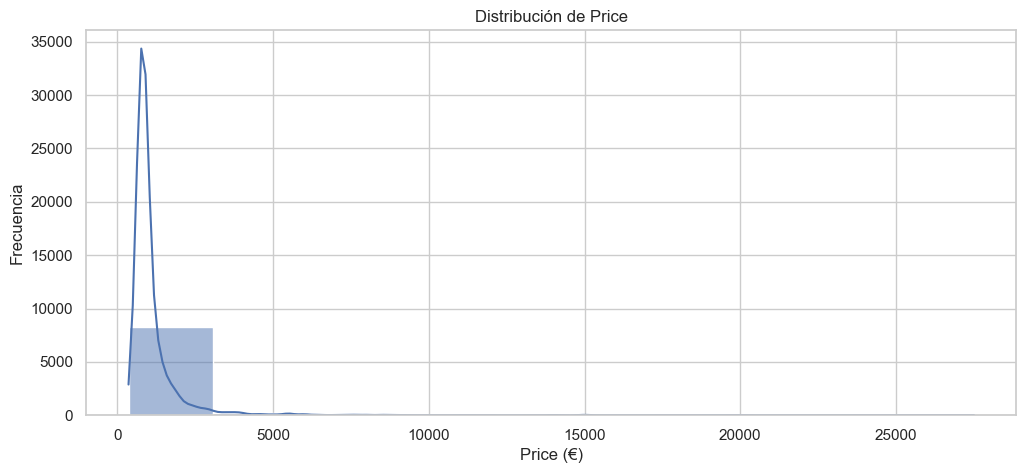

In [57]:
# Para gr√°ficos m√°s bonitos
sns.set(style="whitegrid")

# Histograma + KDE de price para ver distribuci√≥n y posibles outliers
plt.figure(figsize=(12,5))
sns.histplot(df_barcelona['price'], bins=10, kde=True)
plt.title('Distribuci√≥n de Price')
plt.xlabel('Price (‚Ç¨)')
plt.ylabel('Frecuencia')
plt.show()


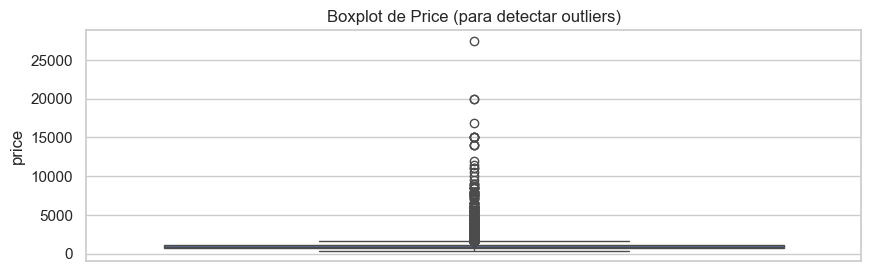

In [58]:
# Boxplot para detectar outliers de price
plt.figure(figsize=(10,3))
sns.boxplot(y=df_barcelona['price'])
plt.title('Boxplot de Price (para detectar outliers)')
plt.show()

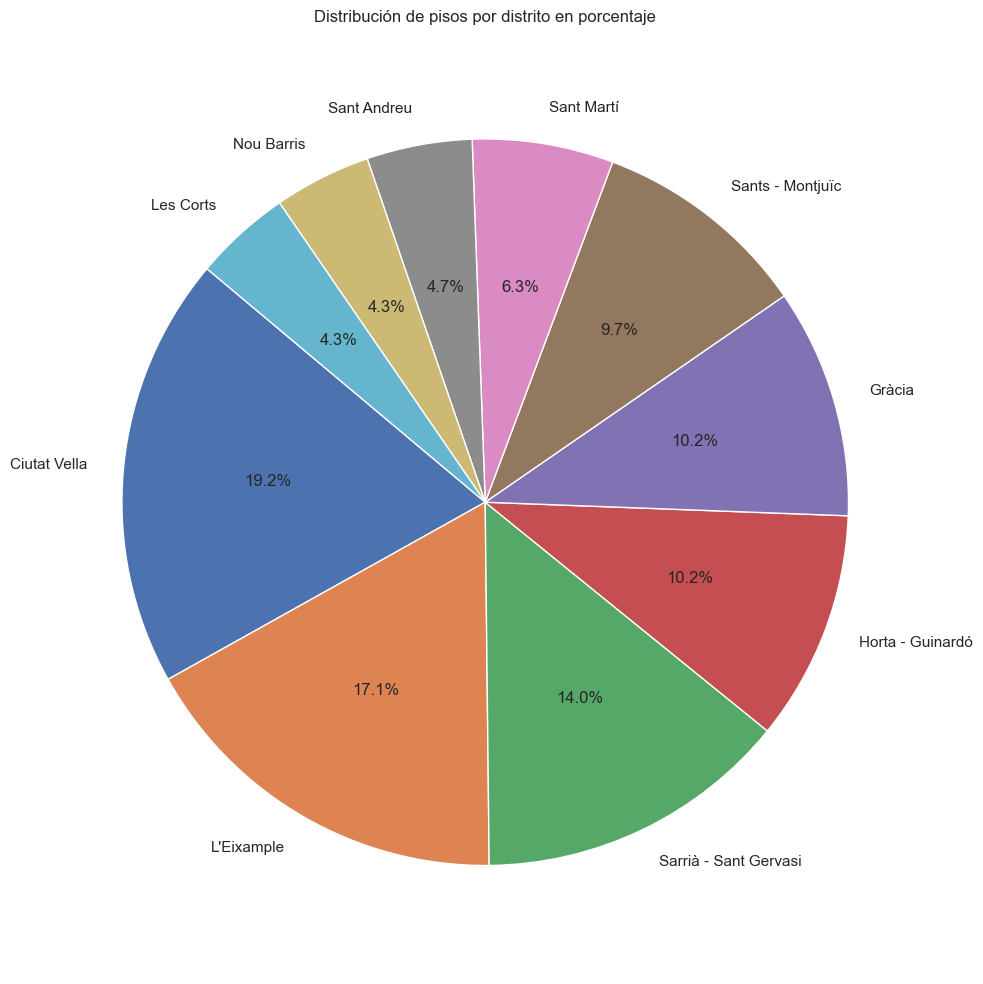

In [59]:
# Gr√°fico de pastel de distribuci√≥n de pisos por distrito en portcentaje

# Conteo de pisos por distrito
district_counts = dfrent['district'].value_counts()

# Crear gr√°fico de pastel
plt.figure(figsize=(10, 10))
plt.pie(district_counts, labels=district_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribuci√≥n de pisos por distrito en porcentaje')
plt.axis('equal')  # Hace el gr√°fico circular
plt.tight_layout()
plt.show()

C:\Users\heatb\AppData\Local\Temp\ipykernel_19296\2680806334.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=price_by_neigh.values, x=price_by_neigh.index, palette="viridis")


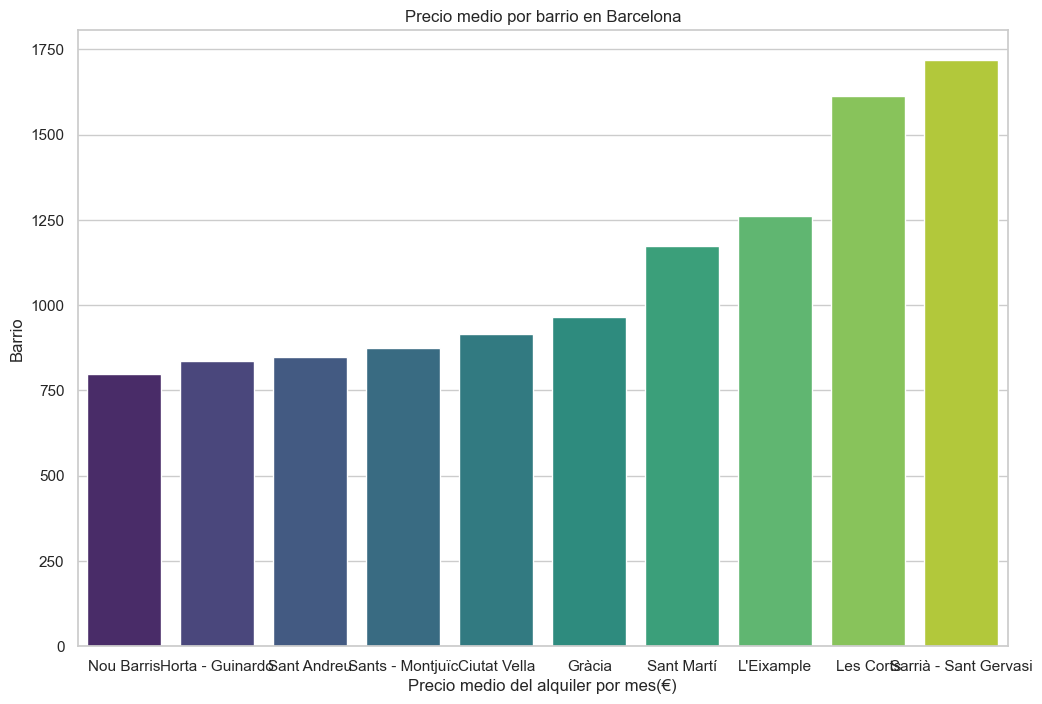

In [60]:
# Precio medio seg√∫n barrio (neighborhood)
price_by_neigh = df_barcelona.groupby('district')['price'].mean().sort_values()

plt.figure(figsize=(12, 8))
sns.barplot(y=price_by_neigh.values, x=price_by_neigh.index, palette="viridis")
plt.title('Precio medio por barrio en Barcelona')
plt.xlabel('Precio medio del alquiler por mes(‚Ç¨)')
plt.ylabel('Barrio')
plt.show()

C:\Users\heatb\AppData\Local\Temp\ipykernel_19296\344834869.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dfrent, x='district', y='price', palette='Set3')


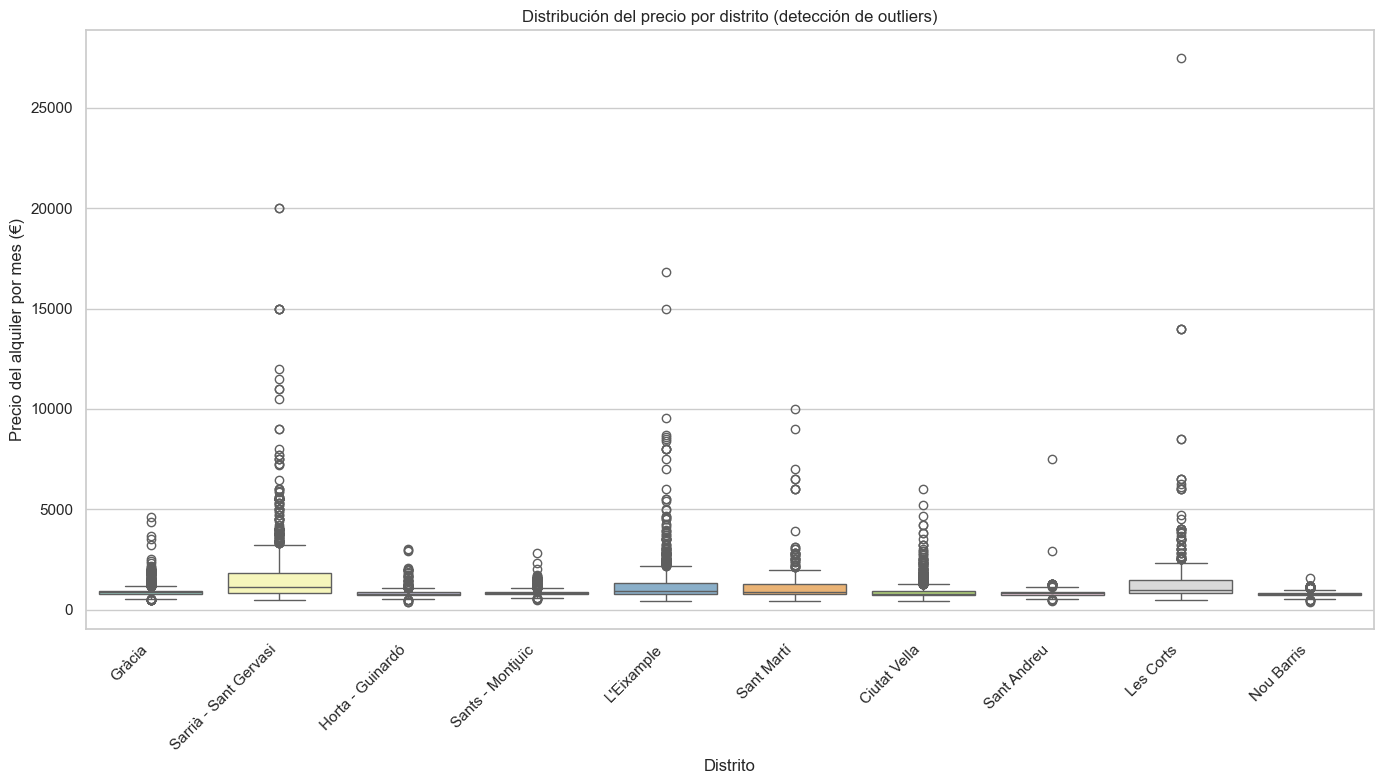

In [61]:
# Gr√°fico de boxplot para ver la distribuci√≥n del precio por distrito y detectar outliers
# Configurar el tama√±o del gr√°fico
plt.figure(figsize=(14, 8))

# Crear el boxplot
sns.boxplot(data=dfrent, x='district', y='price', palette='Set3')

# Rotar etiquetas del eje X si es necesario
plt.xticks(rotation=45, ha='right')

# T√≠tulo y etiquetas
plt.title('Distribuci√≥n del precio por distrito (detecci√≥n de outliers)')
plt.xlabel('Distrito')
plt.ylabel('Precio del alquiler por mes (‚Ç¨)')

# Mostrar el gr√°fico
plt.tight_layout()
plt.show()

C:\Users\heatb\AppData\Local\Temp\ipykernel_19296\1201520006.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=dfrent, x='district', y='price', palette='Pastel1', cut=0)


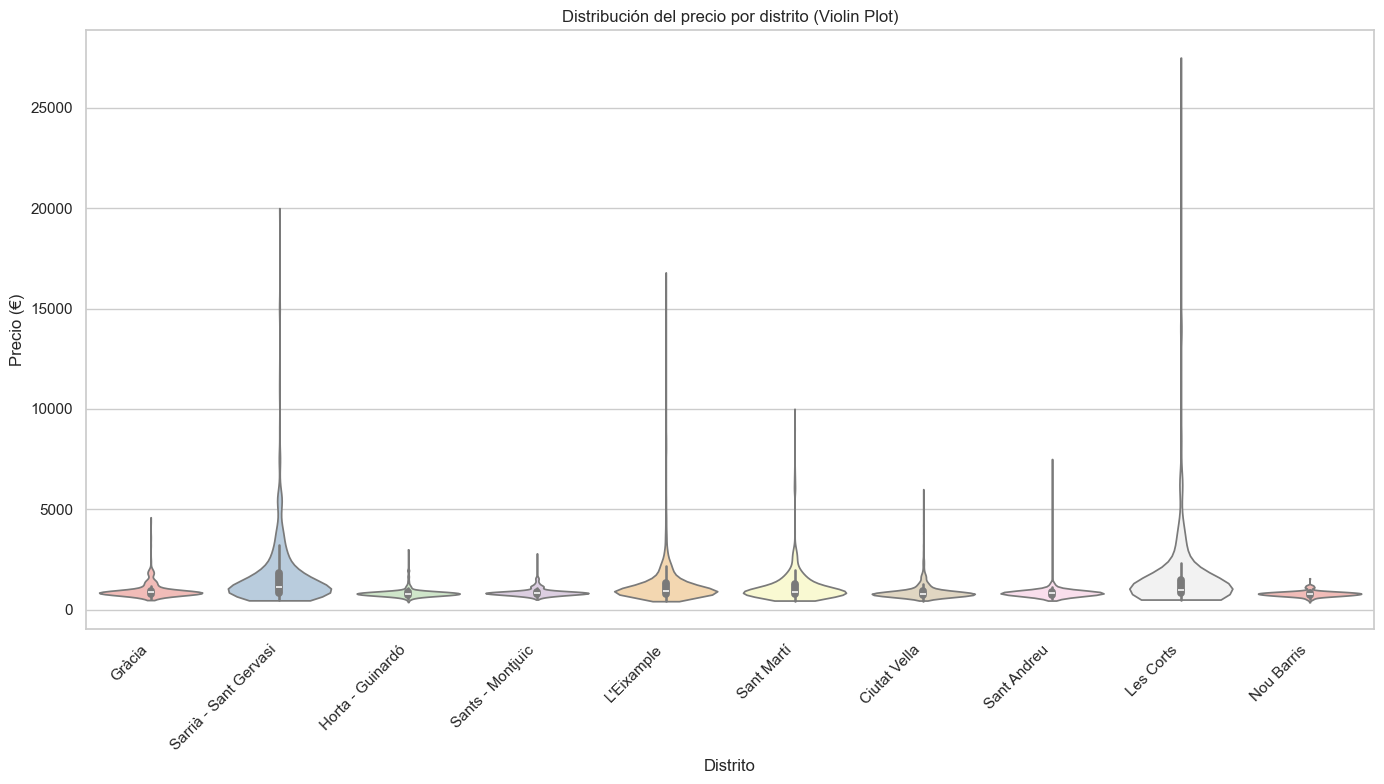

In [62]:
# Configuramos el tama√±o del gr√°fico
plt.figure(figsize=(14, 8))

# Crear el gr√°fico de viol√≠n
sns.violinplot(data=dfrent, x='district', y='price', palette='Pastel1', cut=0)

# Rotar etiquetas del eje X
plt.xticks(rotation=45, ha='right')

# T√≠tulo y etiquetas
plt.title('Distribuci√≥n del precio por distrito (Violin Plot)')
plt.xlabel('Distrito')
plt.ylabel('Precio (‚Ç¨)')

# Mostrar el gr√°fico
plt.tight_layout()
plt.show()

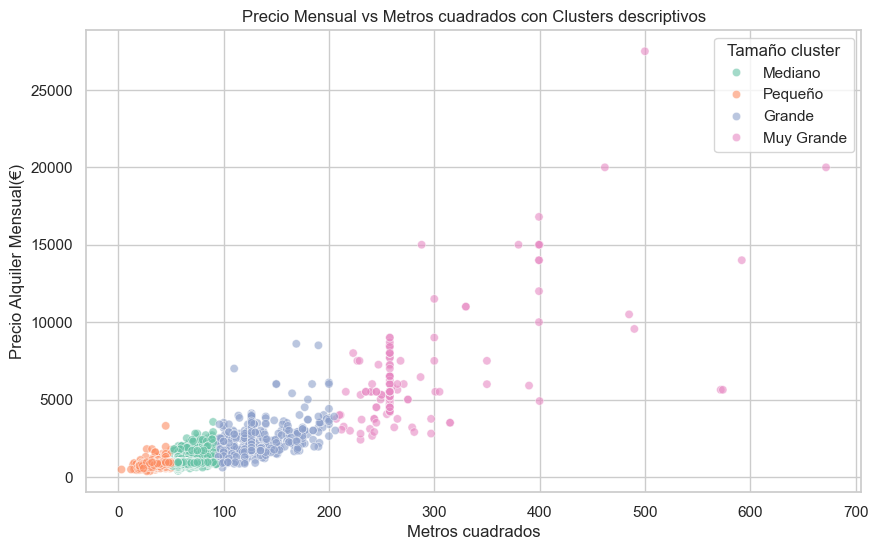

In [63]:
# Precio medio en relaci√≥n a metros cuadrados con clustering
# Filtrar datos v√°lidos
mask_sq = df_barcelona['sq_meters'] > 0
df_clust = df_barcelona.loc[mask_sq, ['sq_meters', 'price']].copy()

kmeans = KMeans(n_clusters=4, random_state=42)
df_clust['cluster'] = kmeans.fit_predict(df_clust[['sq_meters']])

# Calcular medias para asignar etiquetas
cluster_stats = df_clust.groupby('cluster')['sq_meters'].mean().sort_values()
cluster_labels = ['Peque√±o', 'Mediano', 'Grande', 'Muy Grande']
# Mapear cluster a etiqueta
cluster_map = dict(zip(cluster_stats.index, cluster_labels))
df_clust['cluster_label'] = df_clust['cluster'].map(cluster_map)

plt.figure(figsize=(10,6))
sns.scatterplot(data=df_clust, x='sq_meters', y='price', hue='cluster_label', palette='Set2', alpha=0.6)
plt.title('Precio Mensual vs Metros cuadrados con Clusters descriptivos')
plt.xlabel('Metros cuadrados')
plt.ylabel('Precio Alquiler Mensual(‚Ç¨)')
plt.legend(title='Tama√±o cluster')
plt.show()

C:\Users\heatb\AppData\Local\Temp\ipykernel_19296\560463587.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=price_by_rooms.index, y=price_by_rooms.values, palette="Blues_d")


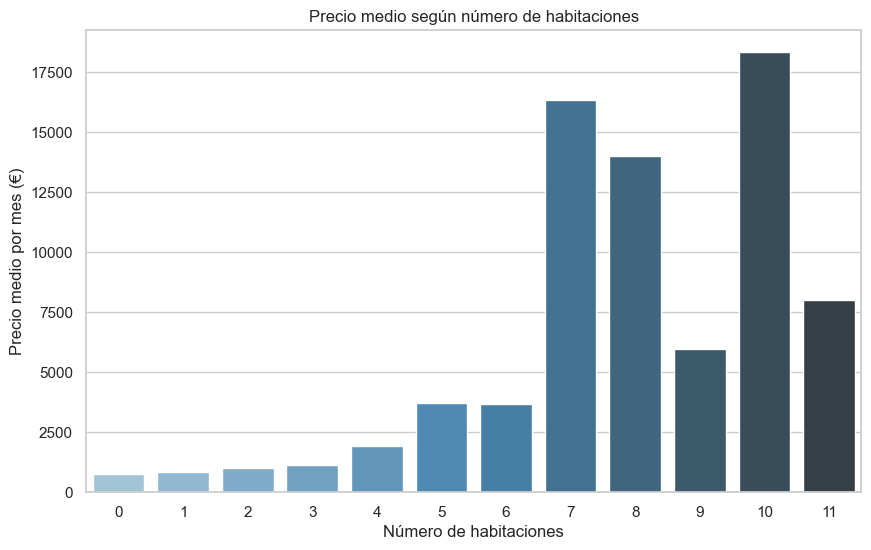

In [64]:
# Precio medio seg√∫n n√∫mero de habitaciones
plt.figure(figsize=(10,6))
price_by_rooms = df_barcelona.groupby('rooms')['price'].mean().sort_index()
sns.barplot(x=price_by_rooms.index, y=price_by_rooms.values, palette="Blues_d")
plt.title('Precio medio seg√∫n n√∫mero de habitaciones')
plt.xlabel('N√∫mero de habitaciones')
plt.ylabel('Precio medio por mes (‚Ç¨)')
plt.show()

C:\Users\heatb\AppData\Local\Temp\ipykernel_19296\4018768405.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=price_by_bathrooms.index, y=price_by_bathrooms.values, palette="Greens_d")


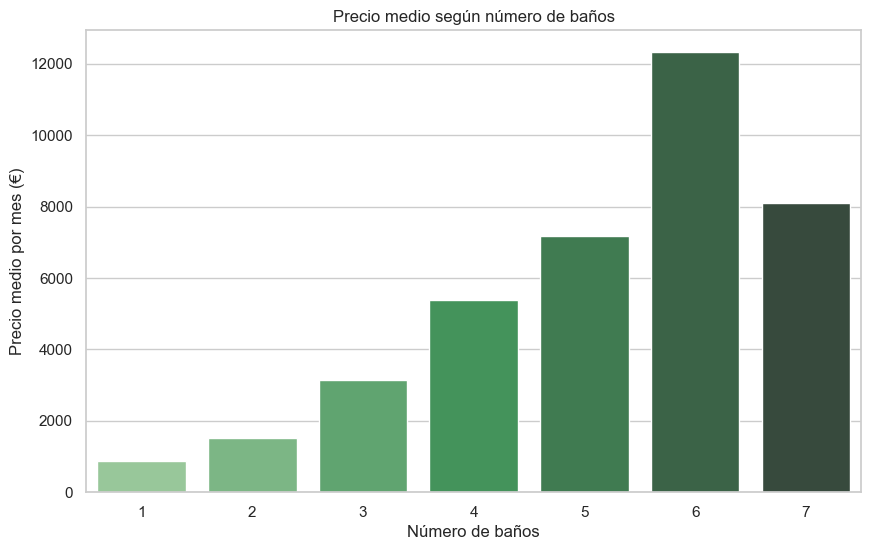

In [65]:
# Precio medio seg√∫n n√∫mero de ba√±os
plt.figure(figsize=(10,6))
price_by_bathrooms = dfrent.groupby('bathrooms')['price'].mean().sort_index()
sns.barplot(x=price_by_bathrooms.index, y=price_by_bathrooms.values, palette="Greens_d")
plt.title('Precio medio seg√∫n n√∫mero de ba√±os')
plt.xlabel('N√∫mero de ba√±os')
plt.ylabel('Precio medio por mes (‚Ç¨)')
plt.show()

C:\Users\heatb\AppData\Local\Temp\ipykernel_19296\1726575583.py:25: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\heatb\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


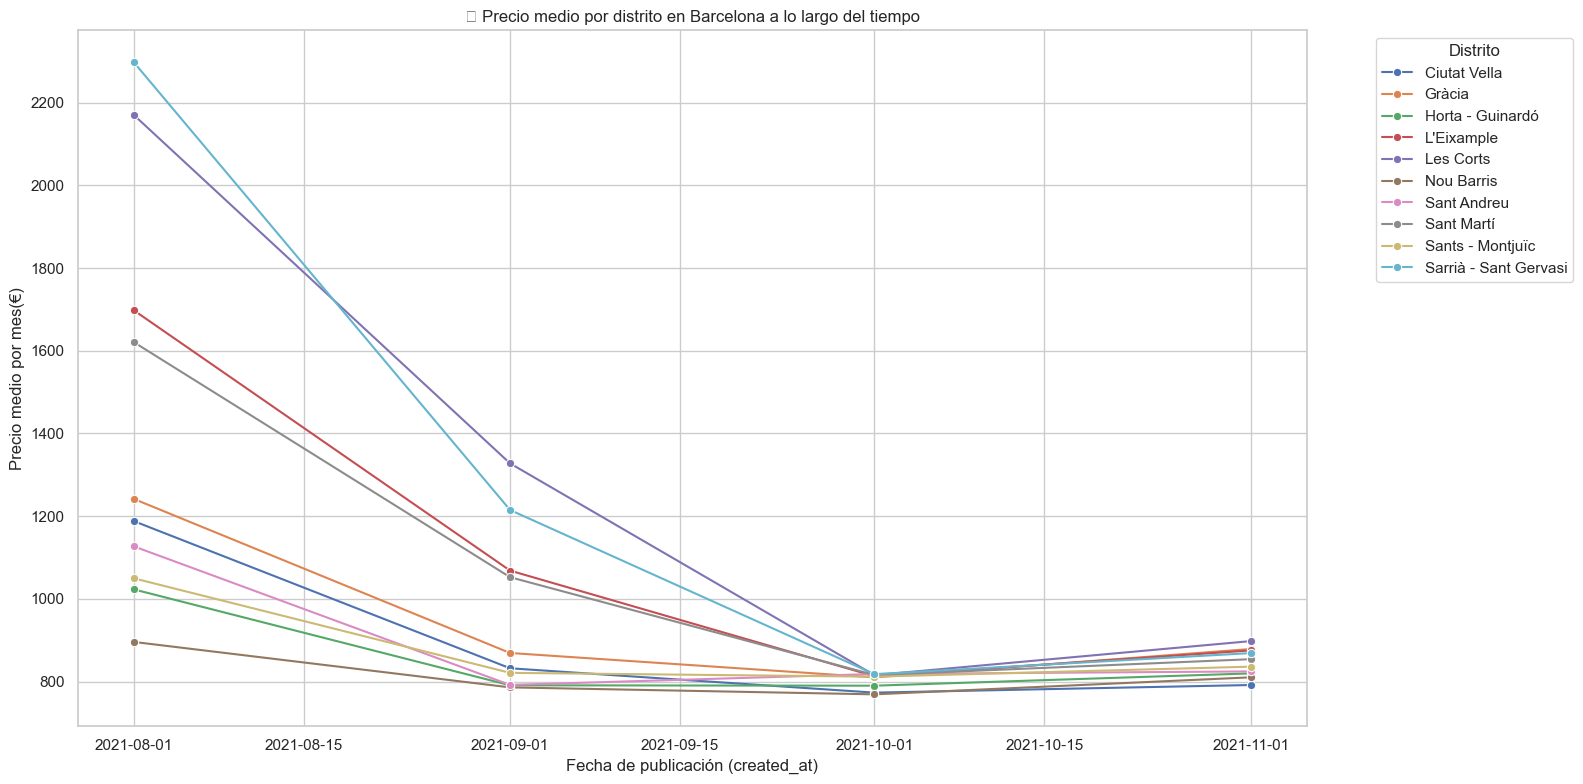

In [68]:
# Asegurar que created_at es datetime
df_barcelona['created_at'] = pd.to_datetime(df_barcelona['created_at'])

# Agrupaci√≥n por mes y distrito
precio_tiempo = (
    df_barcelona
    .groupby([df_barcelona['created_at'].dt.to_period('M'), 'district'])['price']
    .mean()
    .reset_index()
)

# Convertir Period a Timestamp para graficar
precio_tiempo['created_at'] = precio_tiempo['created_at'].dt.to_timestamp()

# Plot
plt.figure(figsize=(16, 8))
sns.lineplot(data=precio_tiempo, x='created_at', y='price', hue='district', marker='o')

# Est√©tica
plt.title('üìä Precio medio por distrito en Barcelona a lo largo del tiempo')
plt.xlabel('Fecha de publicaci√≥n (created_at)')
plt.ylabel('Precio medio por mes(‚Ç¨)')
plt.legend(title='Distrito', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\heatb\AppData\Local\Temp\ipykernel_19296\1083464704.py:22: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\heatb\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


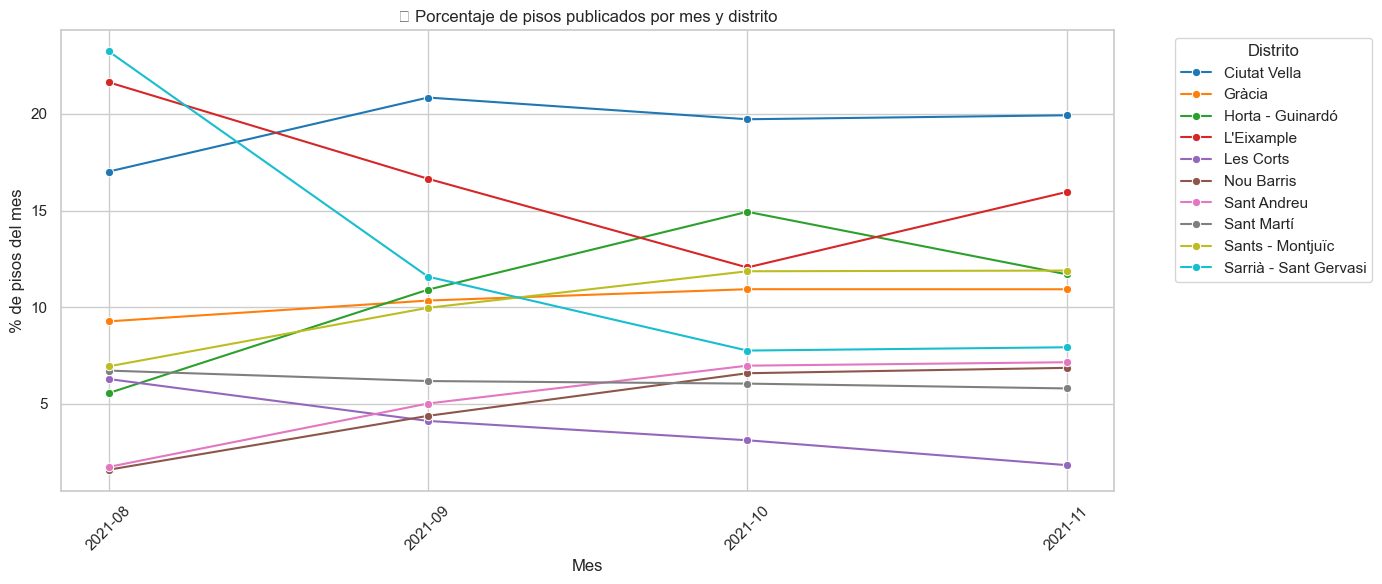

In [72]:
# Aseguramos que created_at es tipo datetime
df_barcelona['created_at'] = pd.to_datetime(df_barcelona['created_at'])

# Extraemos mes-a√±o para agregaci√≥n
df_barcelona['month'] = df_barcelona['created_at'].dt.to_period('M').astype(str)

# Agrupamos n√∫mero de pisos por distrito y mes
grupo = df_barcelona.groupby(['district', 'month']).size().reset_index(name='count')

# Calculamos el total por mes para sacar el % dentro de cada mes
grupo['total_mes'] = grupo.groupby('month')['count'].transform('sum')
grupo['porcentaje'] = grupo['count'] / grupo['total_mes'] * 100

# Gr√°fico
plt.figure(figsize=(14, 6))
sns.lineplot(data=grupo, x='month', y='porcentaje', hue='district', marker='o', palette='tab10')
plt.title('üìÖ Porcentaje de pisos publicados por mes y distrito')
plt.ylabel('% de pisos del mes')
plt.xlabel('Mes')
plt.xticks(rotation=45)
plt.legend(title='Distrito', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

C:\Users\heatb\AppData\Local\Temp\ipykernel_19296\3535913154.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


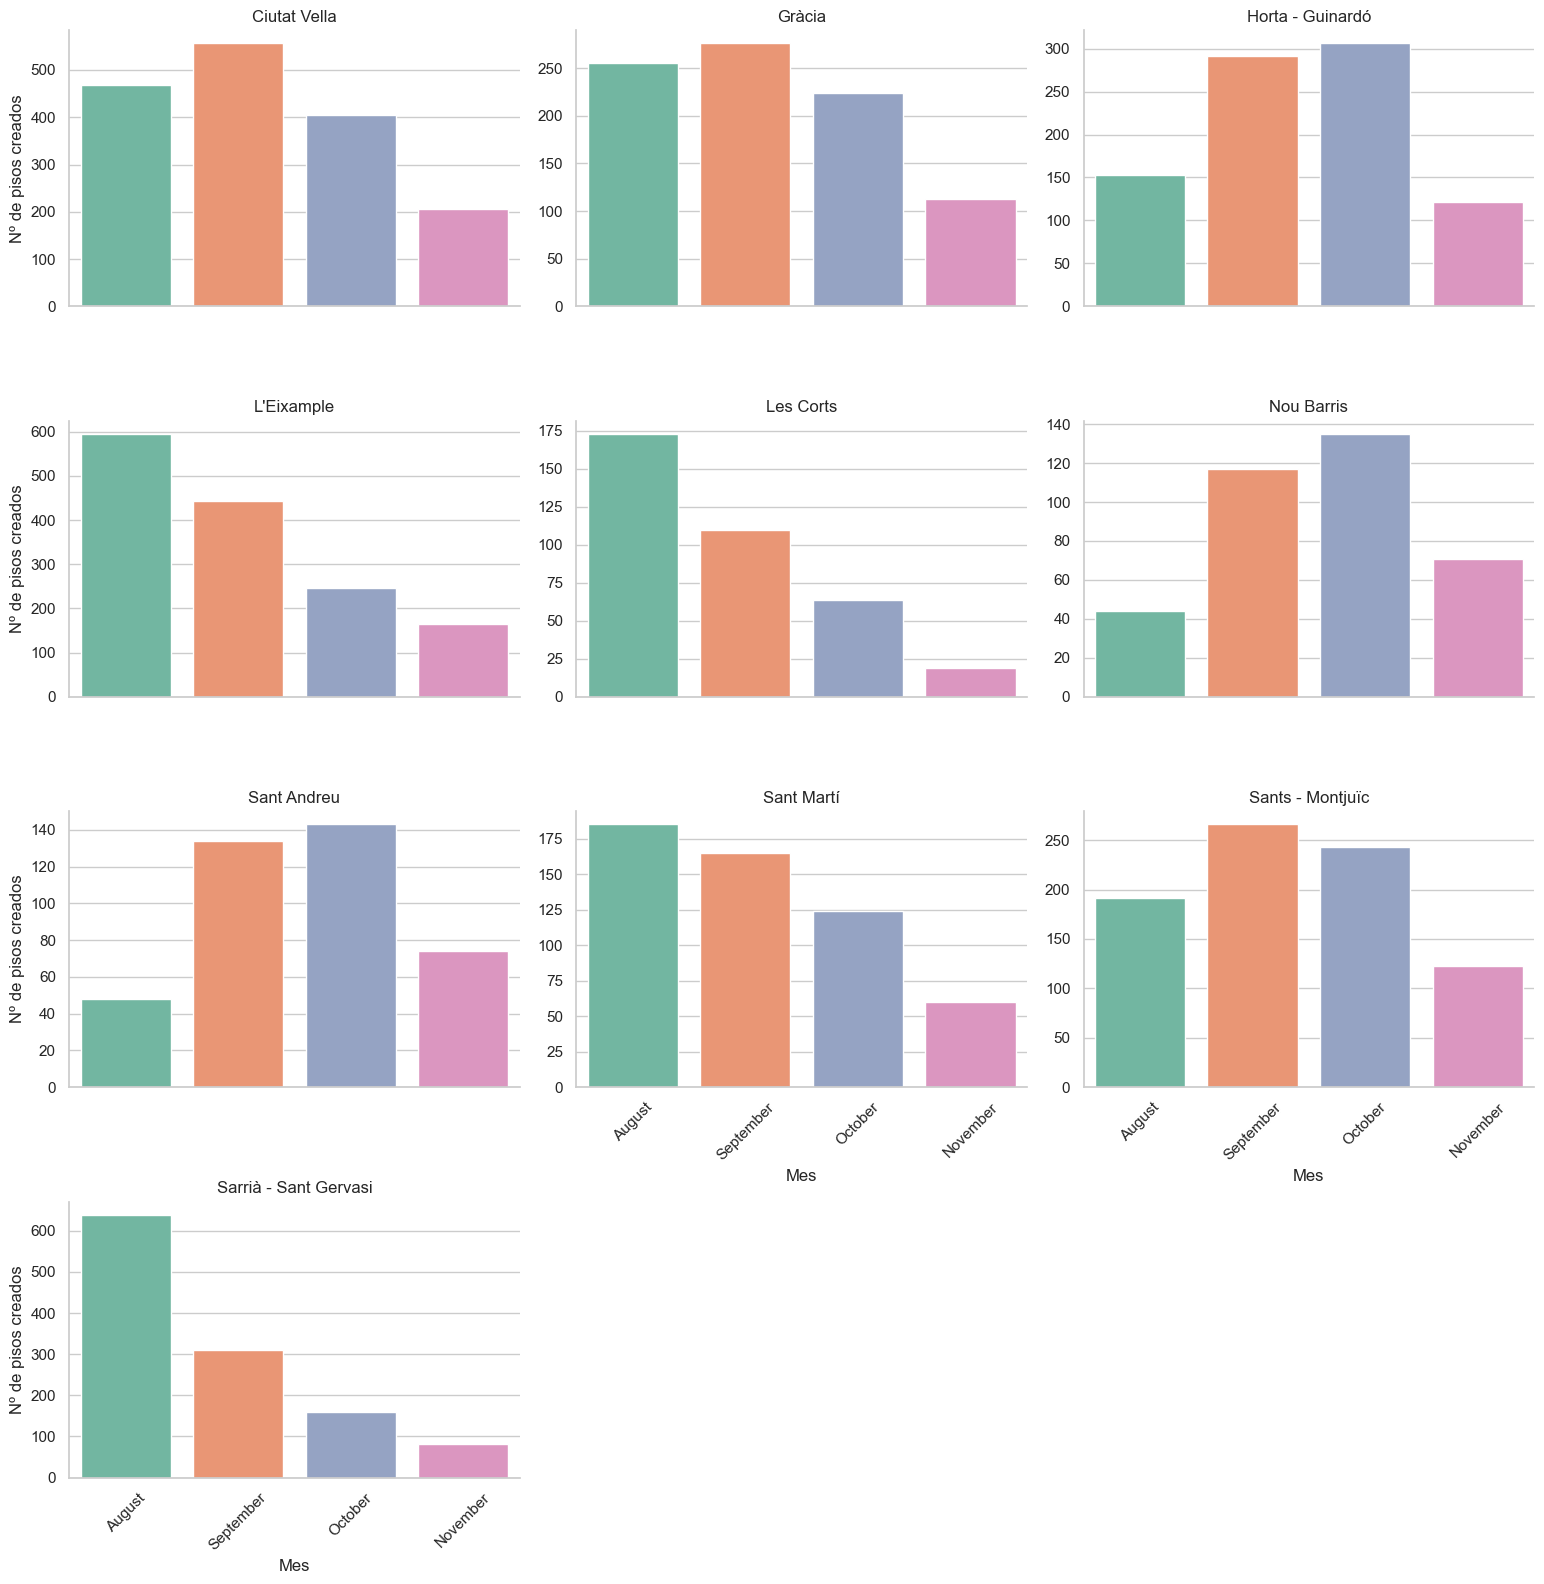

In [75]:
# Aseg√∫rate de que created_at es datetime
df_barcelona['created_at'] = pd.to_datetime(df_barcelona['created_at'], errors='coerce')

# Extraer el nombre del mes
df_barcelona['mes'] = df_barcelona['created_at'].dt.strftime('%B')  # Nombre del mes
df_barcelona['mes_num'] = df_barcelona['created_at'].dt.month       # Para ordenar

# Agrupamos por distrito y mes
conteo = df_barcelona.groupby(['district', 'mes', 'mes_num']).size().reset_index(name='count')

# Ordenamos los meses correctamente
conteo = conteo.sort_values(by=['mes_num', 'district'])

# Configuramos el gr√°fico
g = sns.catplot(
    data=conteo,
    kind='bar',
    x='mes',
    y='count',
    col='district',
    col_wrap=3,  # ajusta esto seg√∫n el n√∫mero de columnas que quieras por fila
    sharey=False,
    height=4,
    aspect=1.3,
    palette='Set2'
)

g.set_titles("{col_name}")
g.set_axis_labels("Mes", "N¬∫ de pisos creados")
for ax in g.axes.flatten():
    for label in ax.get_xticklabels():
        label.set_rotation(45)

plt.tight_layout()
plt.show()